In [3]:
import numpy as np

In [6]:
from keras.layers import Conv2D, Activation, MaxPool2D, Flatten, Dense
from keras.models import Sequential

from keras.layers import Maximum

# Images fed into this model are 512 x 512 pixels with 3 channels
img_shape = (28,28,1)

# Set up model
model = Sequential()

# Add convolutional layer with 3, 3 by 3 filters and a stride size of 1
# Set padding so that input size equals output size
model.add(Conv2D(6,3,input_shape=img_shape))
# Add relu activation to the layer 
model.add(Activation('relu'))

model.add(MaxPool2D(2))

model.add(Conv2D(12,3))

model.add(Activation('relu'))

model.add(MaxPool2D(2))

model.add(Flatten())

model.add(Dense(10))

model.add(Activation('softmax'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 6)         60        
                                                                 
 activation_3 (Activation)   (None, 26, 26, 6)         0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 12)        660       
                                                                 
 activation_4 (Activation)   (None, 11, 11, 12)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 12)          0         
 g2D)                                                 

In [8]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [9]:
from keras.datasets import mnist

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train = np.expand_dims(x_train,-1)

In [13]:
x_test = np.expand_dims(x_test,-1)

In [14]:
x_train.shape

(60000, 28, 28, 1)

In [15]:
y_train.shape

(60000,)

In [16]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Epoch 1/10
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x0000023A5515D620>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x0000023A5515D620>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. O

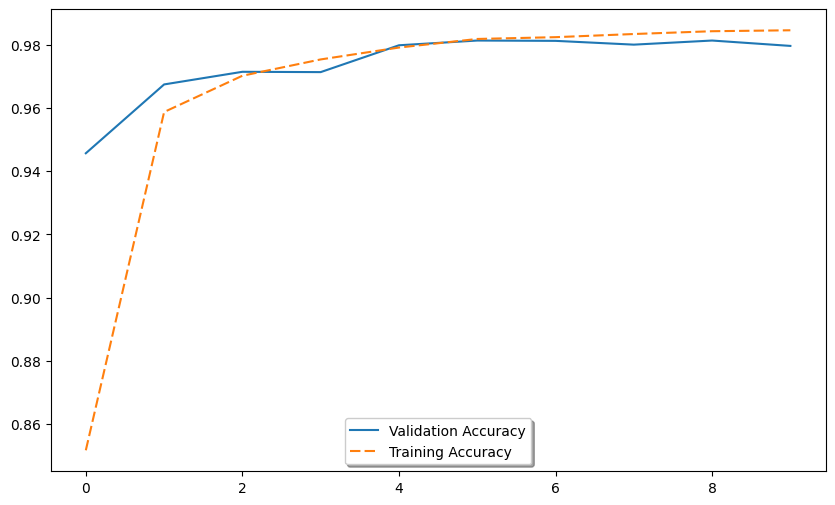

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
gen = ax.plot(history.history['val_acc'], label='Validation Accuracy')
fr = ax.plot(history.history['acc'],dashes=[5, 2], label='Training Accuracy')

legend = ax.legend(loc='lower center', shadow=True)

plt.show()

In [18]:
history.history

{'loss': [1.003186821937561,
  0.139606311917305,
  0.09531758725643158,
  0.07776875793933868,
  0.06675553321838379,
  0.05816149339079857,
  0.05481591075658798,
  0.050336338579654694,
  0.04851736128330231,
  0.04601934552192688],
 'acc': [0.8516333103179932,
  0.9587666392326355,
  0.9702500104904175,
  0.9754166603088379,
  0.9791833162307739,
  0.9818999767303467,
  0.9824666380882263,
  0.9834666848182678,
  0.9843500256538391,
  0.9846500158309937],
 'val_loss': [0.18426060676574707,
  0.10513587296009064,
  0.08936528861522675,
  0.0872240960597992,
  0.06369365006685257,
  0.06515470892190933,
  0.0625733733177185,
  0.06728432327508926,
  0.06846892088651657,
  0.06924010813236237],
 'val_acc': [0.9456999897956848,
  0.9674999713897705,
  0.9714999794960022,
  0.9714000225067139,
  0.9799000024795532,
  0.9814000129699707,
  0.9812999963760376,
  0.9800999760627747,
  0.9814000129699707,
  0.9797000288963318]}

## Regularization

In [19]:
from keras.regularizers import l2

# Set up model
model = Sequential()

# Add convolutional layer with 3, 3 by 3 filters and a stride size of 1
# Set padding so that input size equals output size
model.add(Conv2D(6,3,input_shape=img_shape, kernel_regularizer=l2(0.01)))
# Add relu activation to the layer 
model.add(Activation('relu'))

model.add(MaxPool2D(2))

model.add(Conv2D(12,3,activity_regularizer=l2(0.01)))

model.add(Activation('relu'))

model.add(MaxPool2D(2))

model.add(Flatten())

model.add(Dense(10,bias_regularizer=l2(0.01)))

model.add(Activation('softmax'))

In [20]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [21]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Epoch 1/10
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x0000023A57FD1B20>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x0000023A57FD1B20>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. O

# Dropout

In [22]:
from keras.layers import Dropout

from keras import Dropout 



model = Sequential()


model.add(Conv2D(6,3,input_shape=img_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(2))

model.add(Dropout(0.2))

model.add(Conv2D(12,3))
model.add(Activation('relu'))
model.add(MaxPool2D(2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(10,bias_regularizer=l2(0.01)))

model.add(Activation('softmax'))

In [23]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [24]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Epoch 1/10
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x0000023A5A0C2E80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x0000023A5A0C2E80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. O

In [25]:
from keras.layers import BatchNormalization


model = Sequential()


model.add(Conv2D(6,3,input_shape=img_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(2))

model.add(BatchNormalization())

model.add(Conv2D(12,3))
model.add(Activation('relu'))
model.add(MaxPool2D(2))

model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(10,bias_regularizer=l2(0.01)))

model.add(Activation('softmax'))

In [26]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [27]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Epoch 1/10
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x0000023A6611F7E0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x0000023A6611F7E0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. O

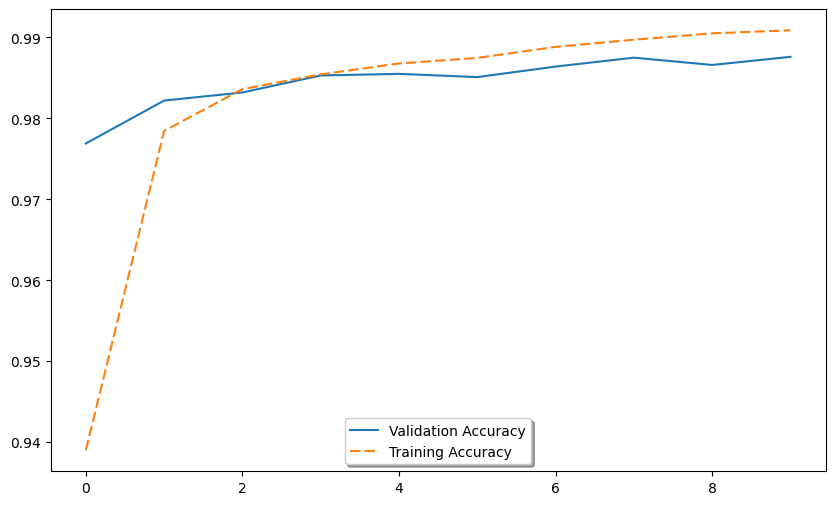

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
gen = ax.plot(history.history['val_acc'], label='Validation Accuracy')
fr = ax.plot(history.history['acc'],dashes=[5, 2], label='Training Accuracy')

legend = ax.legend(loc='lower center', shadow=True)

plt.show()